# Referansemodell i Python

In [247]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from datetime import timedelta

pd.options.mode.chained_assignment = None

In [253]:
df_training = pd.read_csv("data/treningsdata.csv", sep = ";", dtype = {"postnr": str})
df_scoring = pd.read_csv("data/scoringdata.csv", sep = ";", dtype = {"postnr": str})

In [254]:
df_training

,tilsynsobjektid,orgnummer,navn,adrlinje1,adrlinje2,postnr,poststed,tilsynid,dato,total_karakter,tilsynsbesoektype
0,Z1006052059576191189LLAJS_Tilsynsobjekt,876576422.0,Malik's Kvarten Bistro AS,KRISTIAN IV`S GATE 1,NaN,0164,OSLO,Z1601151233010030239YFSGZ_TilsynAvtale,2016-01-15,0,1
1,Z1501071230082032024GTOXC_Tilsynsobjekt,914541034.0,Bakeriet i Brumunddal avdeling CC- Hamar,VANGSVEGEN 62,NaN,2317,HAMAR,Z1601211510285150239IKXEO_TilsynAvtale,2016-01-21,1,0
2,Z1006120609250331126HFNXO_Tilsynsobjekt,987770740.0,Aktiven skiheis - Varmestova og Lavo,Kvamskogen,NaN,5600,NORHEIMSUND,Z1603101430592020239SQLTI_TilsynAvtale,2016-03-10,1,0
3,Z1107281100559960160KWPRX_Tilsynsobjekt,998066662.0,Golfkafeen,Belsjøveien 50,NaN,1445,DRØBAK,Z1605111530190600240CQCNS_TilsynAvtale,2016-05-11,1,0
4,Z1305061320139293177THOPJ_Tilsynsobjekt,911860805.0,Marianne Bakeri og Kafe,ODDEN 2,NaN,5745,AURLAND,Z1601281551398970239WJGDG_TilsynAvtale,2016-01-28,3,0
...,...,...,...,...,...,...,...,...,...,...,...
33040,Z1811261443594962025ITFYB_Tilsynsobjekt,973165569.0,Larsens bakeri - utsalg og kafe,Skånevikveien 27,NaN,5594,SKÅNEVIK,Z1903121245183040240AKAKK_TilsynAvtale,2019-03-12,0,0
33041,Z1609071259126400378YKTNK_Tilsynsobjekt,917507953.0,Kaffelade,Torgalmenningen 8 - Galleriet,NaN,5014,BERGEN,Z1706011234148320239ISPHV_TilsynAvtale,2017-05-31,2,0
33042,Z1006120516127581189INJLE_Tilsynsobjekt,990953791.0,Pikekyss,RASMUS RØNNEBERGSGATE,NaN,6003,ÅLESUND,Z1604191143049200239RMRUW_TilsynAvtale,2016-04-19,0,0
33043,Z1006061504487071190UWBRX_Tilsynsobjekt,991929622.0,Fyr på Lade,HAAKON VII'S GATE 12,NaN,7041,TRONDHEIM,Z1706291050201280239VDDHQ_TilsynAvtale,2017-06-29,1,0


In [255]:
df_training.value_counts("total_karakter")

total_karakter
0    16662
1    10423
2     5475
3      485
dtype: int64

In [256]:
df_training["navn"] = df_training["navn"].str.upper()

# Undersøk variabler

## Kebab?

Undersøker ny variabel "er_kebab", som er TRUE hvis navnet på organisasjonen inneholder ordet "kebab", og FALSE ellers:

In [257]:
df_training = df_training.assign(er_kebab = df_training["navn"].str.contains("KEBAB"))

In [258]:
df_training.value_counts("er_kebab")

er_kebab
False    32596
True       449
dtype: int64

In [259]:
(
    df_training
    .groupby("er_kebab")
    .agg(
        snitt_karakter = ("total_karakter", "mean"),
        antall = ("total_karakter", "count")
    )
)

,snitt_karakter,antall
er_kebab,,
False,0.687937,32596
True,0.899777,449


In [260]:
counts = (
    df_training
    .groupby("er_kebab")["total_karakter"]
    .value_counts(normalize = True)
    .rename("andel")
    .reset_index()
)

counts

,er_kebab,total_karakter,andel
0,False,0,0.504817
1,False,1,0.316695
2,False,2,0.164223
3,False,3,0.014266
4,True,0,0.461024
5,True,2,0.271715
6,True,1,0.222717
7,True,3,0.044543


<AxesSubplot:xlabel='total_karakter', ylabel='andel'>

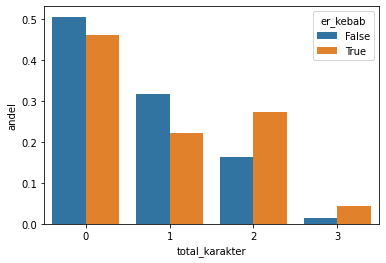

In [261]:
sns.barplot(
    data = counts, 
    x = "total_karakter",
    y = "andel",
    hue = "er_kebab"
)

<AxesSubplot:xlabel='er_kebab', ylabel='total_karakter'>

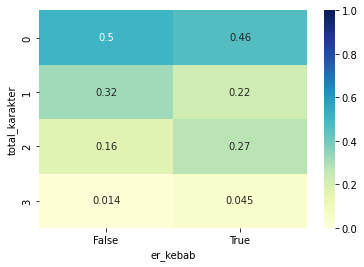

In [262]:
sns.heatmap(
    data = counts.pivot("total_karakter", "er_kebab", "andel"), 
    annot = True, 
    cmap = "YlGnBu", 
    vmin = 0, 
    vmax = 1
)

## Poststed

In [263]:
def fct_lump(col, min_freq = 0.01, new_name = 'other'):
    """
    This function creates a group for strings that appear less than a 
    given frequency, defined as a share of all groups (factors).

    Inspired by forcats::fct_lump() in R. 

    Args:
        col: Pandas series, column in DataFrame
        min_freq: Minimum frequency to accept as decimal before setting new_name
        new_name: String name for the new group

    Returns:
        pd.Series with lumped factors (if below threshold)
    """
    series = pd.value_counts(col)
    mask = (series/series.sum()).lt(min_freq)
    return pd.Series(np.where(col.isin(series[mask].index), new_name, col))


df_training = df_training.assign(poststed_lmp = fct_lump(df_training["poststed"], min_freq = 0.02))

<AxesSubplot:xlabel='total_karakter', ylabel='andel'>

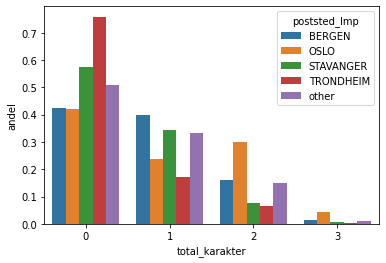

In [264]:
counts = (
    df_training
    .groupby("poststed_lmp")["total_karakter"]
    .value_counts(normalize = True)
    .rename("andel")
    .reset_index()
)

sns.barplot(
    data = counts, 
    x = "total_karakter",
    y = "andel",
    hue = "poststed_lmp"
)

<AxesSubplot:xlabel='poststed_lmp', ylabel='total_karakter'>

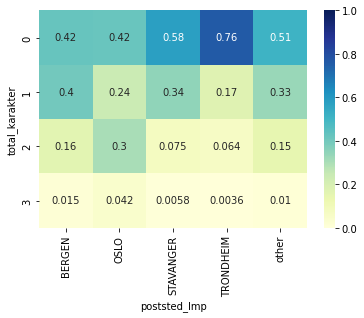

In [265]:
sns.heatmap(
    data = counts.pivot("total_karakter", "poststed_lmp", "andel"), 
    annot = True, 
    cmap = "YlGnBu", 
    vmin = 0, 
    vmax = 1
)

# Lag modell

In [266]:
#Definerer x og y variabler
x_vars = ['er_kebab', 'tilsynsbesoektype', 'poststed']
X = df_training[x_vars]
y = df_training['total_karakter']

# Definer training og testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

print(f'Training Set: {X_train.shape[0]:,d} rows\nTest Set: {X_test.shape[0]:,d} rows')

Training Set: 23,131 rows
Test Set: 9,914 rows


In [268]:
# Steps for numeriske variabler
numeric_transformer = Pipeline(
    steps = [
        ('imputer', SimpleImputer(strategy = 'mean'))
    ]
)

# Steps for kategoriske variabler
categorical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy = 'most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)

# Finn numeriske og kategoriske kolonner
numeric_features = X_train.select_dtypes(include = ['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include = ['object']).columns

preprocessor = ColumnTransformer(
    transformers = [
        ('numeric', numeric_transformer, numeric_features),
        ('categorical', categorical_transformer, categorical_features)
    ]
)

# Kombiner Pipeline med modell (her: lineær regresjon)
lm = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('modell', LinearRegression())
    ]
)

In [269]:
# Tren Pipelinen
lm.fit(X_train, y_train)

# Bruk pipeline på nye data
pred = lm.predict(X_test)

Siden vi har behandlet input som numerisk må vi konvertere for å få "harde" prediksjoner. Vi velger her å bruke en enkel "round": 


In [270]:
# Begrenser prediksjonen til [0, 3] 
pred = np.clip(pred, 0, 3)

softpred = pred
hardpred = pred.round()

# Validering av modell
Som valideringsmetric scores dere på macro-averaged MAE, eller MMAE, som er et måltall som egner seg for ordinale utfall når utfallet er ubalansert, les mer [her](https://stats.stackexchange.com/questions/338904/measures-of-ordinal-classification-error-for-ordinal-regression).

Dette er gjennomsnittlig avvik per risikonivå. Det vil si at dersom du predikerer kun 0 eller 1 på alle (de vanligste verdiene), så vil du få en ganske dårlig score - fordi du vil straffes hardt for alle du bommer på som skulle hatt 2 eller 3, selv om det er veldig få av disse. 

Dere velger selv om dere vil sende inn "harde prediksjoner" (eks: 0, 1, 2, 3) eller "myke" prediksjoner (eks: 0.13, 0.89, 2.42, 2.99). 

Merk at jo lavere MMAE, jo bedre er modellen. 

In [271]:
def mmae(y_true, y_pred):
    """
    Funksjonen beregner Macro Averaged Mean Absolute Error.  
    Dvs at den beregner MAE per class i y_true, og tar snittet av disse. 

    Params:
        y_true: Vektor med sanne verdier
        y_pred: Vektor med predikerte verdier
    """
    df = pd.DataFrame({"y_true": y_test, "y_pred": y_pred})
    maes = df.groupby("y_true").apply(lambda d: mean_absolute_error(d["y_true"], d["y_pred"]))
    return maes.mean()

mmae_lm_hard = mmae(y_test, y_pred = hardpred)
mmae_lm_soft = mmae(y_test, y_pred = softpred)

print(f"MMAE (hard) = {mmae_lm_hard},\nMMAE (soft) = {mmae_lm_soft}")

MMAE (hard) = 1.0009172937555426,
MMAE (soft) = 1.0320000438539767


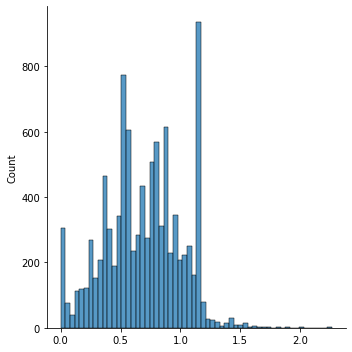

In [272]:
sns.displot(data = softpred)

<AxesSubplot:ylabel='count'>

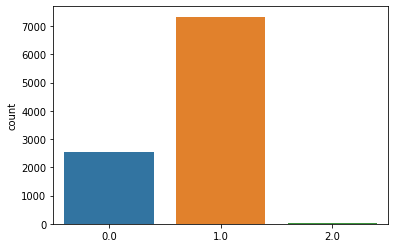

In [273]:
sns.countplot(x = hardpred)

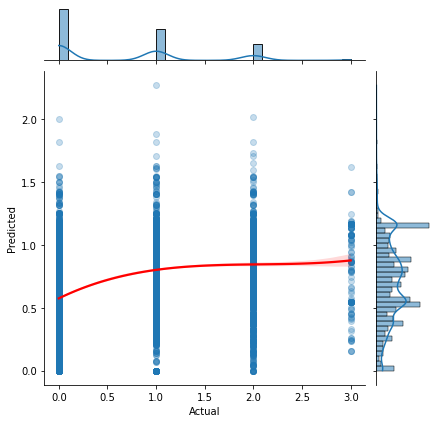

In [274]:
import matplotlib.pyplot as plt

p = sns.jointplot(
    y = softpred, 
    x = y_test, 
    kind = "reg", 
    joint_kws = {
        "scatter_kws":{"alpha": 0.25}, 
        "line_kws": {"color":"red"},
        "order":3
    }
)

p.ax_joint.set_xlabel("Actual")
p.ax_joint.set_ylabel("Predicted")
plt.show()

# Lag innlevering

In [279]:
# Lag samme variabler i df_scoring som vi anvender i modell
# Tips: Lag en funksjon som du anvender på trening og scoring
df_scoring = df_scoring.assign(
    er_kebab = df_scoring["navn"].str.contains("KEBAB")
)

X_score = df_scoring[x_vars]
pred_score = lm.predict(X_score)
round_score = pred_score.round()

df_scoring = df_scoring.assign(final_prediction = round_score)

innlevering = df_scoring[["tilsynid", "dato", "final_prediction"]]
innlevering

,tilsynid,dato,final_prediction
0,Z2107081356362630239TMJGL_TilsynAvtale,2021-07-08,1.0
1,Z2107020842545310239AULJY_TilsynAvtale,2021-07-01,1.0
2,Z2104291500352540240OCTIH_TilsynAvtale,2021-04-29,1.0
3,Z2107061655052730239NMNIF_TilsynAvtale,2021-07-06,1.0
4,Z2104201309179870240SEVGY_TilsynAvtale,2021-04-20,1.0
...,...,...,...
5457,Z2103031226347230240AKUQU_TilsynAvtale,2021-03-03,1.0
5458,Z2106162232046940239SBBNT_TilsynAvtale,2021-06-16,1.0
5459,Z2103011403059210240GIYJX_TilsynAvtale,2021-03-01,1.0
5460,Z2102251532293320240KQDXS_TilsynAvtale,2021-02-25,0.0


In [285]:
import os
if not os.path.exists('output'):
    os.makedirs('output')

# TODO: Sett inn deres lagnavn her!
lagnavn = "pyref"
innlevering.to_csv(f"output/{lagnavn}_scoring.csv", sep = ";", decimal = ",")

# Appendix
## Tuning
Ønsker du å tune modellen, kan følgende kodesnutt hjelpe. Vi tuner her Lasso-modellen sitt alpha-parameter

Merk at vi anbefaler ikke å bruke altfor mye tid på tuning da det ofte er lite å hente og tar mye tid (spesielt med dårlig PC), men dersom man er fornøyd med modellen ellers kan tuning være det "lille ekstra" som skiller førsteplass og andreplass!


In [235]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, make_scorer
from sklearn import linear_model

Tuning kan også benyttes med pipeline. Da må du legge til navnet på modellen i pipen som prefix til hvert parameternavn, etterfulgt av to understreker. For eksempel: i pipen underga vi modellen navnet modell, da må parameternavnene i grid={...} bli modell__alpha

In [241]:
# Kombiner Pipeline med modell (her: Lasso. husk å inkludere modellnavnet i Grid under)
ls = Pipeline(
    steps = [
        ('preprocessor', preprocessor),
        ('modell', linear_model.Lasso())
    ]
)

In [242]:
grid = {
    'modell__alpha': [0.1, 0.2]
}

kfold = KFold(n_splits = 5)

In [243]:
grid = GridSearchCV(
  ls,
  param_grid = grid,
  cv = kfold,
  scoring = 'neg_mean_absolute_error', # OBS: Optimalt sett bruk MMAE her
  verbose = 1,
  n_jobs = -1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer())]),
                                                                         Index(['tilsynsbesoektype'], dtype='object')),
                                                                        ('categorical',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                       

In [244]:
print(grid.best_params_)

{'modell__alpha': 0.1}


## Finne vanligste ord eller ngrams i orgnavn
Under finner vi de vanligste ordene som opptrer i datasettet. Kanskje noen av de kan skille seg ut?

In [189]:
pd.Series(' '.join(df_training['navn']).split()).value_counts()[:15]

AS            3230
RESTAURANT    2537
&             2436
OG            2345
CAFE          1649
KAFE          1566
-             1561
PIZZA         1396
HOTEL         1094
BAR            947
HOTELL         881
SUSHI          872
BAKERI         713
HOUSE          684
AVD.           609
dtype: int64